# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [2]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [3]:
df1 = data[data.isna().any(axis=1)]
data = data.fillna(0)

Text(0, 0.5, 'Total_Bilirubin')

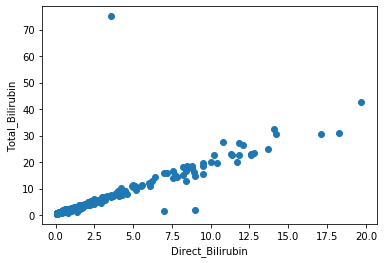

In [4]:
br = data[['Direct_Bilirubin','Total_Bilirubin']]
plt.scatter(br['Direct_Bilirubin'], br['Total_Bilirubin'])
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')

Text(0, 0.5, 'Total_Bilirubin')

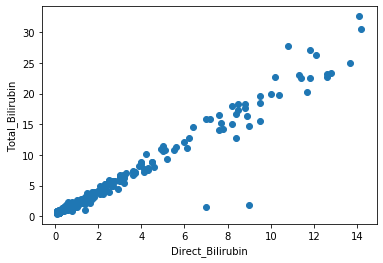

In [5]:
br = br[(br['Direct_Bilirubin'] < 15) & (br['Total_Bilirubin'] < 40)]
plt.scatter(br['Direct_Bilirubin'], br['Total_Bilirubin'])
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')

In [6]:
br[(br['Direct_Bilirubin'] > 6) & (br['Total_Bilirubin'] < 5)]

,Direct_Bilirubin,Total_Bilirubin
246,9.0,1.8
261,7.0,1.5


In [7]:
br.drop(br.index[[246, 261]], inplace = True)

Text(0, 0.5, 'Total_Bilirubin')

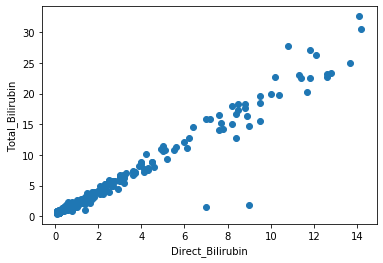

In [8]:
plt.scatter(br['Direct_Bilirubin'], br['Total_Bilirubin'])
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
#почему-то не дропается по индексу (( не смог разобраться в чем дело

In [9]:
direct = br['Direct_Bilirubin']
total = br['Total_Bilirubin']
direct = np.array(direct).reshape(-1,1)
total = np.array(total).reshape(-1,1)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    direct,
    total,
    test_size = 0.2
)

In [11]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
predicted_y = linreg.predict(X_test)
linreg.score(X_test, y_test)

0.8044725229004649

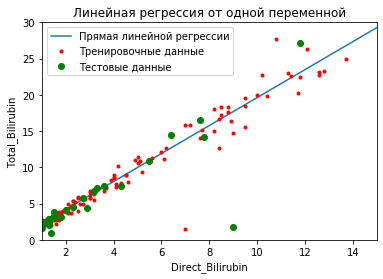

In [13]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия от одной переменной')
x = np.linspace(0, 20, 100)
# k = model.coef_
# b = model.intercept_
y = linreg.coef_*x + linreg.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(1, 15)
plt.ylim(0, 30)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Пример, как считать квантили:

In [14]:
# print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
# print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
# print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
# print("10 квантиль ряда : ", np.quantile(age, .1)) 

Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [15]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.504,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.920,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.100,2.0


Пример квартилей:

In [16]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.940566,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.327962,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.000000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.920000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Посчитать квартили для всех колонок. 

In [17]:
data.quantile([.25, .50, .75, 1], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.70,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.92,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.10,2.0
1.00,90.0,75.0,19.7,2110.0,2000.0,4929.0,9.6,5.5,2.80,2.0


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

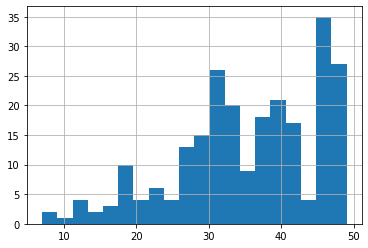

In [18]:
# младше 50 и больные
lower_sick = data[(data['Age'] < 50) & (data['Dataset'] == 1)]
lower_sick = lower_sick['Age']
lower_sick.hist(bins = 20)

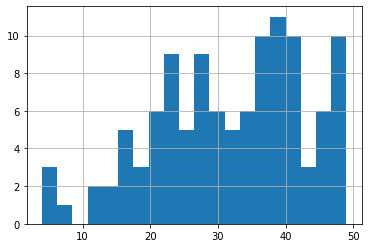

In [19]:
# младше 50 и здоровые
lower_healthy = data[(data['Age'] < 50) & (data['Dataset'] == 2)]
lower_healthy = lower_healthy['Age']
lower_healthy.hist(bins = 20)

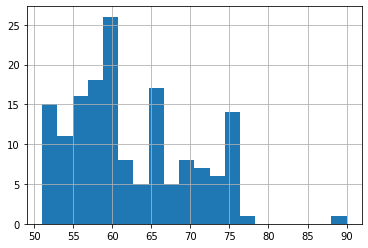

In [20]:
# больше 50 и больные
ower_sick = data[(data['Age'] > 50) & (data['Dataset'] == 1)]
ower_sick = ower_sick['Age']
ower_sick.hist(bins = 20)

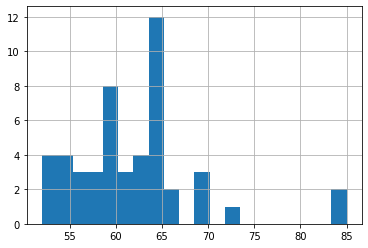

In [21]:
# больше 50 и здоровые
ower_healthy = data[(data['Age'] > 50) & (data['Dataset'] == 2)]
ower_healthy = ower_healthy['Age']
ower_healthy.hist(bins = 20)

In [22]:
# Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?
print('Младше 50 и больные', lower_sick.mean())
print('Младше 50 и здоровые', lower_healthy.mean())
print('Старше 50 и больные', ower_sick.mean())
print('Старше 50 и больные', ower_healthy.mean())

print('Младше 50 и больные - квантиль', lower_sick.quantile([.50]))
print('Младше 50 и здоровые - квантиль', lower_healthy.quantile([.50]))
print('Старше 50 и больные - квантиль', ower_sick.quantile([.50]))
print('Старше 50 и больные - квантиль', ower_healthy.quantile([.50]))
# По средним значениям - среди тех, кто младше 50 в среднем здоровые несколько моложе, чем больные.
# Среди тех, кто старше 50 - разница между больными и здоровыми в среднем несущественная. 
# В общем, возраст является фактором болезни
# О том же свидетельствуют квантили. С 50% вероятностью среди <50 лет больной будет старше, чем здоровый. 
# У пожилых эта разница не так существенна.

Младше 50 и больные 35.356846473029044
Младше 50 и здоровые 31.651785714285715
Старше 50 и больные 62.20886075949367
Старше 50 и больные 62.08163265306123
Младше 50 и больные - квантиль 0.5    37.0
Name: Age, dtype: float64
Младше 50 и здоровые - квантиль 0.5    34.0
Name: Age, dtype: float64
Старше 50 и больные - квантиль 0.5    60.0
Name: Age, dtype: float64
Старше 50 и больные - квантиль 0.5    61.0
Name: Age, dtype: float64



Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [23]:
br_sick = data[data['Dataset'] == 1]['Total_Bilirubin']
stats.ttest_1samp(br_sick, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

In [24]:
len(br_sick)
# t-критерий выше табличного значения, p-value минимальный, нулевую гипотезу отвергаем

416

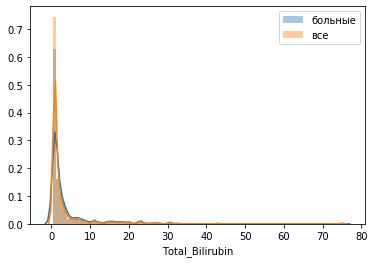

In [25]:
br_sick = data[data['Dataset'] == 1]['Total_Bilirubin']
alls = data['Total_Bilirubin']
sns.distplot(br_sick, 100)
sns.distplot(alls, 100)
plt.legend(['больные', 'все'])
plt.show()
#у больных билирубин в среднем 1,5-2 раза ниже

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [26]:
br_sick = data[data['Dataset'] == 1]['Total_Bilirubin']
healthy = data[data['Dataset'] == 2]['Total_Bilirubin']
stats.ttest_ind(br_sick, healthy)

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

In [27]:
# высокий t-критерий и p-value - группы статистически значимо различаются

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [29]:
young = data[data['Age'] < 30]['Dataset']
middle = data[(data['Age'] > 30) & (data['Age'] < 55)]['Dataset']
senior = data[data['Age'] > 55]['Dataset']
stats.f_oneway(young, middle, senior)

F_onewayResult(statistic=9.055850027948711, pvalue=0.00013497029237184406)

In [ ]:
#выборки различаются.

Вопросы задавать на почту yustiks@gmail.com